Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lendo dataset

In [ ]:

file_name='bakery_sales.csv'
df = pd.read_csv(file_name)

Exibindo info do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

Contando valores nulos

In [ ]:
df.isnull().sum()

,0
datetime,233
day of week,234
total,234
place,488
angbutter,681
plain bread,1797
jam,2434
americano,2242
croissant,1907
caffe latte,2461


Copiando dataframe original

In [ ]:
df_limpo = df.copy()

Removendo linhas onde Data e hora são nulos

In [ ]:
df_limpo.dropna(subset=['datetime'], inplace=True)

Removendo colunas totalmente vazias

In [ ]:
df_limpo.drop(columns=['croque monsieur', 'mad garlic'], inplace=True)

Traduzindo colunas

In [ ]:
traducao_pt_br = {
    'datetime': 'data_hora',
    'day of week': 'dia_semana',
    'total': 'total_venda',
    'place': 'local',
    'angbutter': 'pao_doce_feijao',
    'plain bread': 'pao_simples',
    'jam': 'geleia',
    'americano': 'cafe_americano',
    'croissant': 'croissant',
    'caffe latte': 'cafe_com_leite',
    'tiramisu croissant': 'croissant_tiramisu',
    'cacao deep': 'cacau_profundo',
    'pain au chocolat': 'pao_de_chocolate',
    'almond croissant': 'croissant_amendoas',
    'milk tea': 'cha_com_leite',
    'gateau chocolat': 'bolo_chocolate',
    'pandoro': 'pandoro',
    'cheese cake': 'cheesecake',
    'lemon ade': 'limonada',
    'orange pound': 'bolo_de_laranja',
    'wiener': 'salsicha',
    'vanila latte': 'latte_baunilha',
    'berry ade': 'suco_frutas_vermelhas',
    'tiramisu': 'tiramisu',
    'merinque cookies': 'biscoitos_merengue'
}

df_limpo.rename(columns=traducao_pt_br, inplace=True)

Substituindo dados nulos somente nos produtos

In [ ]:
colunas_produtos = [col for col in df_limpo.columns if col not in ['data_hora', 'dia_semana', 'total_venda', 'local']]
df_limpo[colunas_produtos] = df_limpo[colunas_produtos].fillna(0).astype(int)

Preenchendo nulos na coluna local

In [ ]:
df_limpo['local'].fillna('Desconhecido', inplace=True)

/tmp/ipython-input-3417972352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['local'].fillna('Desconhecido', inplace=True)


Convertendo data

In [ ]:
df_limpo['data_hora'] = pd.to_datetime(df_limpo['data_hora'])

Criando coluna de tempo

In [ ]:
df_limpo['mes'] = df_limpo['data_hora'].dt.month
df_limpo['dia'] = df_limpo['data_hora'].dt.day
df_limpo['hora'] = df_limpo['data_hora'].dt.hour

Dias traduzidos

In [ ]:
traducao_dias_pt_br = {
    'Thur': 'Quinta-feira',
    'Fri': 'Sexta-feira',
    'Sat': 'Sábado',
    'Sun': 'Domingo',
    'Mon': 'Segunda-feira',
    'Tues': 'Terça-feira',
    'Wed': 'Quarta-feira'
}
df_limpo['dia_semana'] = df_limpo['dia_semana'].map(traducao_dias_pt_br)

Verificando limpeza

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421 entries, 0 to 2653
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_hora              2421 non-null   datetime64[ns]
 1   dia_semana             2420 non-null   object        
 2   total_venda            2420 non-null   float64       
 3   local                  2421 non-null   object        
 4   pao_doce_feijao        2421 non-null   int64         
 5   pao_simples            2421 non-null   int64         
 6   geleia                 2421 non-null   int64         
 7   cafe_americano         2421 non-null   int64         
 8   croissant              2421 non-null   int64         
 9   cafe_com_leite         2421 non-null   int64         
 10  croissant_tiramisu     2421 non-null   int64         
 11  cacau_profundo         2421 non-null   int64         
 12  pao_de_chocolate       2421 non-null   int64         
 13  croissan

Verificando dados nulos

In [ ]:
df_limpo.isnull().sum()

,0
data_hora,0
dia_semana,1
total_venda,1
local,0
pao_doce_feijao,0
pao_simples,0
geleia,0
cafe_americano,0
croissant,0
cafe_com_leite,0


Verificando Dataframe

In [ ]:
df_limpo.head()

,data_hora,dia_semana,total_venda,local,pao_doce_feijao,pao_simples,geleia,cafe_americano,croissant,cafe_com_leite,...,limonada,bolo_de_laranja,salsicha,latte_baunilha,suco_frutas_vermelhas,tiramisu,biscoitos_merengue,mes,dia,hora
0,2019-07-11 15:35:00,Quinta-feira,23800.0,Desconhecido,1,0,0,1,0,0,...,0,0,0,1,0,0,0,7,11,15
1,2019-07-11 16:10:00,Quinta-feira,15800.0,Desconhecido,1,0,0,0,0,0,...,0,1,0,0,0,0,0,7,11,16
2,2019-07-12 11:49:00,Sexta-feira,58000.0,Desconhecido,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,12,11
3,2019-07-13 13:19:00,Sábado,14800.0,Desconhecido,1,1,0,0,0,0,...,0,0,0,1,0,0,0,7,13,13
4,2019-07-13 13:22:00,Sábado,15600.0,Desconhecido,2,0,0,0,0,0,...,0,0,0,0,0,0,0,7,13,13


Salvando dataframe limpo

In [ ]:
df_limpo.to_csv('bakery_sales_limpo.csv', index=False)

Utilizando dataframe limpo

In [ ]:
df_final = pd.read_csv('bakery_sales_limpo.csv')

Colunas de produtos

In [ ]:
colunas_produtos = [
    'pao_doce_feijao', 'pao_simples', 'geleia', 'cafe_americano', 'croissant',
    'cafe_com_leite', 'croissant_tiramisu', 'cacau_profundo', 'pao_de_chocolate',
    'croissant_amendoas', 'cha_com_leite', 'bolo_chocolate', 'pandoro',
    'cheesecake', 'limonada', 'bolo_de_laranja', 'salsicha',
    'latte_baunilha', 'suco_frutas_vermelhas', 'tiramisu', 'biscoitos_merengue'
]

Calculando total vendido de cada produto

In [ ]:
total_produtos = df_final[colunas_produtos].sum().sort_values(ascending=False)

Criando gráfico

/tmp/ipython-input-1254972633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_produtos.values, y=total_produtos.index, palette='viridis')


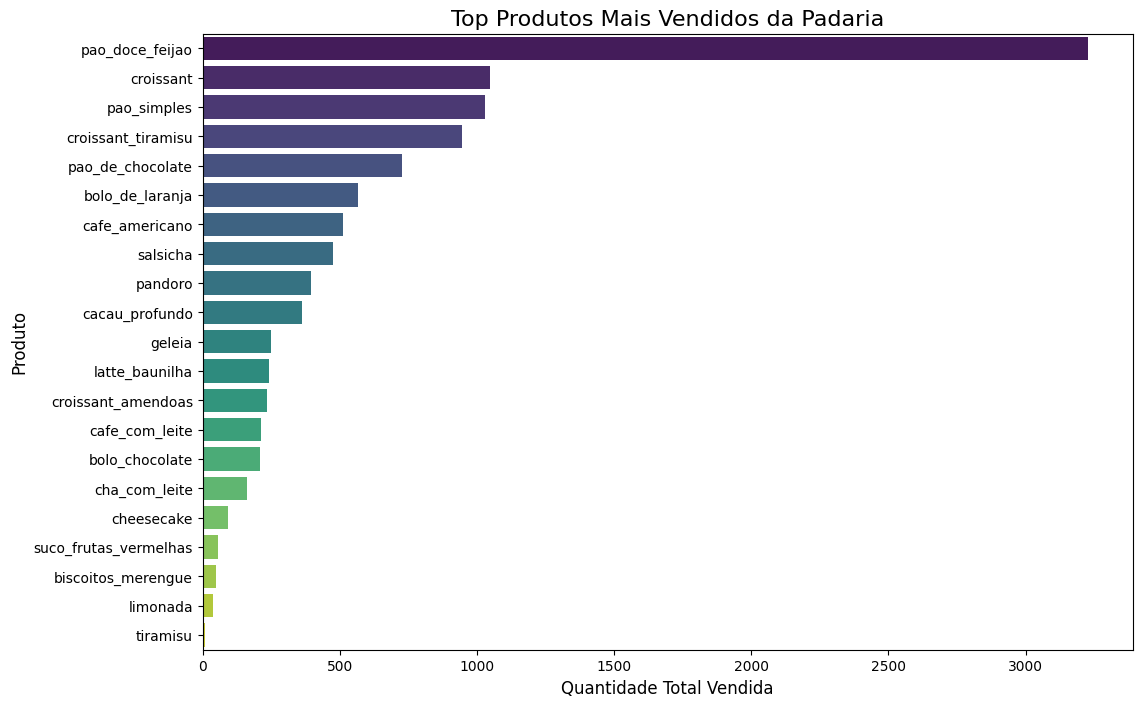

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=total_produtos.values, y=total_produtos.index, palette='viridis')

plt.title('Top Produtos Mais Vendidos da Padaria', fontsize=16)
plt.xlabel('Quantidade Total Vendida', fontsize=12)
plt.ylabel('Produto', fontsize=12)

plt.savefig('top_produtos_vendidos.png', bbox_inches='tight')

Mostrando o total de produtos

In [ ]:
total_produtos

,0
pao_doce_feijao,3229
croissant,1049
pao_simples,1028
croissant_tiramisu,945
pao_de_chocolate,726
bolo_de_laranja,566
cafe_americano,513
salsicha,476
pandoro,394
cacau_profundo,364


Ordenando dias

In [ ]:
ordem_dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

Criando gráficos

/tmp/ipython-input-3396778849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, y='dia_semana', order=ordem_dias, palette='plasma')


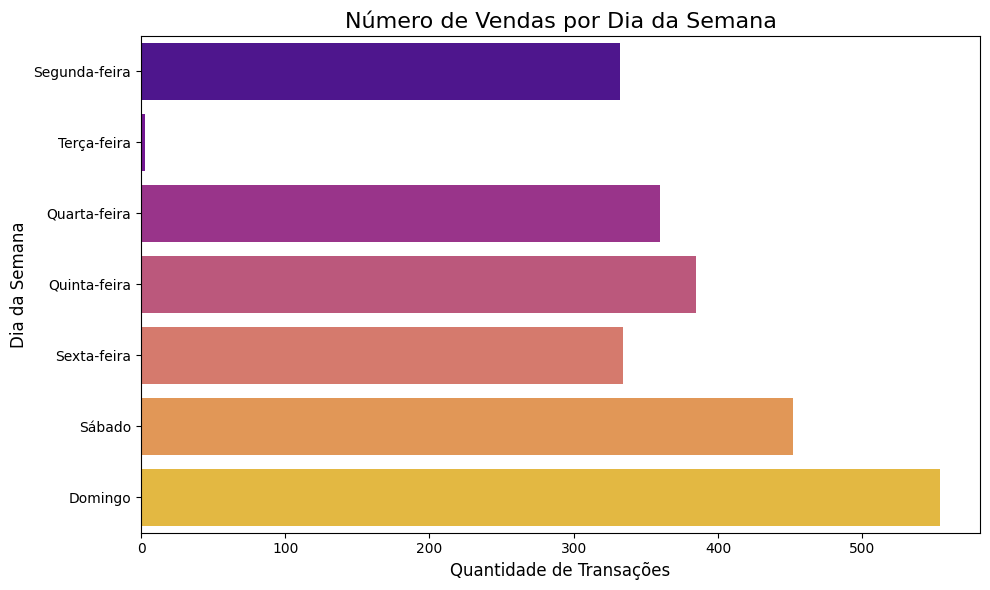

In [ ]:
# Gráfico 1: Número de Vendas por Dia da Semana
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, y='dia_semana', order=ordem_dias, palette='plasma')
plt.title('Número de Vendas por Dia da Semana', fontsize=16)
plt.xlabel('Quantidade de Transações', fontsize=12)
plt.ylabel('Dia da Semana', fontsize=12)
plt.tight_layout()
plt.savefig('vendas_por_dia.png')
plt.show()

/tmp/ipython-input-877478406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='hora', palette='magma')


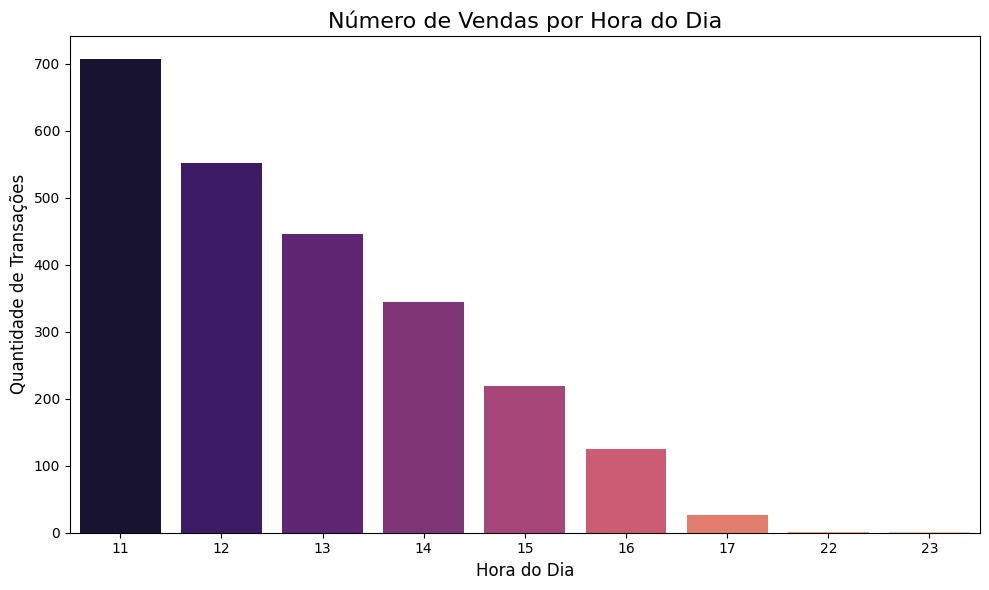

In [ ]:
# Gráfico 2: Número de Vendas por Hora do Dia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='hora', palette='magma')
plt.title('Número de Vendas por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.tight_layout()
plt.savefig('vendas_por_hora.png')
plt.show()

Verificando locais

In [30]:
df_final['local'].value_counts()

,count
local,
동면,416
Desconhecido,255
후평 2동,254
후평 3동,249
후평 1동,196
석사동,169
퇴계동,146
효자 2동,143
소양동,132


Análise de Vendas ao longo do tempo

<Axes: xlabel='mes'>

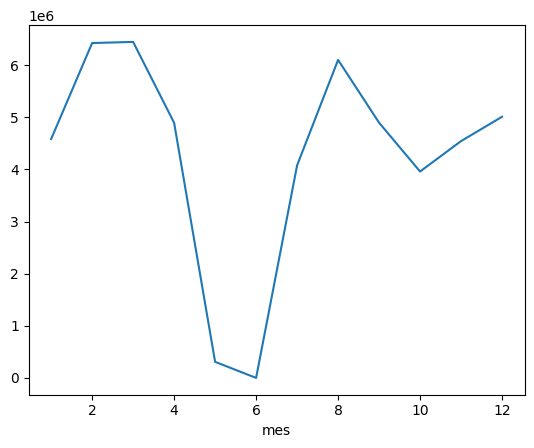

In [33]:
# Dica de código:
df_final.groupby('mes')['total_venda'].sum().plot(kind='line')

Tamanho do dataset

In [35]:
df_limpo.shape

(2421, 28)

In [36]:
df.shape

(2654, 27)

Verificando o dado mais antigo e o mais novo para obter período dos dados

In [39]:
data_mais_antiga = df_limpo['data_hora'].min()
data_mais_antiga

Timestamp('2019-07-11 15:35:00')

In [40]:
data_mais_atual = df_limpo['data_hora'].max()
data_mais_atual

Timestamp('2020-06-18 14:52:00')

Somando quantidade de produtos vendidos

In [42]:
soma_total_produtos=total_produtos.sum()
soma_total_produtos

np.int64(10840)

Verificando dados duplicados

In [43]:
duplicated_data=df_limpo.duplicated().sum()
duplicated_data

np.int64(0)